<a href="https://colab.research.google.com/github/Asritha0606/GenerativeAI/blob/main/GenAI_RAG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contents:

1. Document loaders
2. Text splitters
3. Retrievers

Document loaders: provide a "load" method for loading data as documents from a source.

1. Text

2. CSV

3. File directory

4. HTML

5. JSON

Ref- https://python.langchain.com/v0.1/docs/modules/data_connection/document_loaders/

In [ ]:
!pip install -q groq langchain-groq litellm PyPDF2 chromadb text-generation langchain sentence-transformers langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 130.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 31.1 MB/s e

In [ ]:
!pip install -q unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.8/195.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.2/304.2 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 11.7 MB/s eta 0:00:00


In [ ]:
from langchain_community.document_loaders import TextLoader

In [ ]:


loader = TextLoader("/content/state_of_the_union.txt")
loader.load()

[Document(metadata={'source': '/content/state_of_the_union.txt'}, page_content='Title - From Time to Time: History of the State of the Union\n\n"The President shall from time to time give to Congress information of the State of the Union and recommend to their Consideration such measures as he shall judge necessary and expedient." Article II, Sec. 3, U.S. Constitution\n\nGeorge Washington rode on a carriage driven by six horses from his house on Cherry Street to Federal Hall in New York to give his deliver his first annual message in person.\nOn a cold January morning, the President rode in a carriage drawn by six horses from his residence on Cherry Street in New York to Federal Hall for a joint meeting of the two bodies of Congress, the House of Representatives and the Senate. When George Washington personally delivered the first annual message to Congress on January 8, 1790, he was aware of his constitutional duty to deliver his message and of the precedent he was setting for future 

## File Directory

In [ ]:
!pip install -q tqdm

In [ ]:
!unzip '/content/prompting_assignment.zip'

Archive:  /content/prompting_assignment.zip
replace prompting_assignment/prompting_assignment/clinical_note_sample1.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
from langchain_community.document_loaders import DirectoryLoader
loader = DirectoryLoader('/content/prompting_assignment', glob="**/*.txt", show_progress=True)

In [ ]:
docs = loader.load()
len(docs)

100%|██████████| 9/9 [00:00<00:00, 46.29it/s]


9

In [ ]:
docs

[Document(metadata={'source': '/content/prompting_assignment/prompting_assignment/usecases_for_prompt_engineer_assignment.txt'}, page_content="Design a prompt to perform the following tasks-\n\n#1 Information Extraction from clinical notes- Team #1 Social Determinants of Health(SDOH)\n\nGiven a csv file with SDOH factors and their corresponding codes Part 1:Extract the patient's name, address, hospital name, allergies, major medical problem, allergies and social determinant of health(SDOH) factor for your respective notes in a json format.\n\nPart2: Your code should output match the extracted SDOH factor with its corresponding code given in the csv file.\n\n#2 Customer Review Extraction\n\nTeam #2\n\nExtract the customer(name & ID), product and company details Extract the sentiment of the customer What was good or bad about the product- give specific details"),
 Document(metadata={'source': '/content/prompting_assignment/prompting_assignment/clinical_note_sample2.txt'}, page_content="P

In [ ]:
docs[1]

Document(metadata={'source': '/content/prompting_assignment/prompting_assignment/clinical_note_sample2.txt'}, page_content="Pt: Robert J. Thornton (DOB 03/15/1968) residing @ 742 Maple Grove Ln, Apt #3B, Riverside, CA 92501, ph# (555) 123-4567. Emergency contact: Sarah Thornton (wife) @ (555) 123-8901. Insurance: HealthFirst Plus #8675309 & Medicare #4454789. Treating facility: Riverside Community Medical Center, 1234 Healthcare Drive, Riverside, CA 92503, Tel: (555) 999-8000. Pt w/ known allergies to: PCN (hives), Sulfa (rash), Latex (contact derm). Initial encounter 03/22/23: Pt presents w/ fatigue, excess thirst, freq urination x2wks. VS: BP 142/88, HR 88, T 98.6°F, RR 16, O2 sat 97%, wt 198#. 55yo male w/ classic s/sx hyperglycemia, works in a construction site with dust/debris exposure. Reports drinking 6-8 bottles H2O/day. +FamHx DM (mother). Labs show FBS: 286, A1c: 9.8%, BUN/Cr: 18/1.1. New dx T2DM. Started metformin 500mg BID, rx'd glucometer, scheduled DM edu. F/u visit 04/05

## CSV file loader

In [ ]:
from langchain_community.document_loaders.csv_loader import CSVLoader
loader = CSVLoader(file_path='/content/prompting_assignment/prompting_assignment/sdoh_factors2.csv')#, encodings='utf-8')
data = loader.load()

In [ ]:
data

[Document(metadata={'source': '/content/prompting_assignment/prompting_assignment/sdoh_factors2.csv', 'row': 0}, page_content='SDOH factor: Exposure to radiation\nCode: Z63'),
 Document(metadata={'source': '/content/prompting_assignment/prompting_assignment/sdoh_factors2.csv', 'row': 1}, page_content='SDOH factor: Lack of access to clean water\nCode: Z64'),
 Document(metadata={'source': '/content/prompting_assignment/prompting_assignment/sdoh_factors2.csv', 'row': 2}, page_content='SDOH factor: Exposure to high noise\nCode: Z65'),
 Document(metadata={'source': '/content/prompting_assignment/prompting_assignment/sdoh_factors2.csv', 'row': 3}, page_content='SDOH factor: Workplace-related stress\nCode: Z66'),
 Document(metadata={'source': '/content/prompting_assignment/prompting_assignment/sdoh_factors2.csv', 'row': 4}, page_content='SDOH factor: Limited access to healthcare services\nCode: Z67'),
 Document(metadata={'source': '/content/prompting_assignment/prompting_assignment/sdoh_facto

Source column- to mention source as any column name instead of file path

In [ ]:
loader = CSVLoader(file_path='/content/prompting_assignment/prompting_assignment/sdoh_factors2.csv', source_column="Code")
data = loader.load()
print(data)

[Document(metadata={'source': 'Z63', 'row': 0}, page_content='SDOH factor: Exposure to radiation\nCode: Z63'), Document(metadata={'source': 'Z64', 'row': 1}, page_content='SDOH factor: Lack of access to clean water\nCode: Z64'), Document(metadata={'source': 'Z65', 'row': 2}, page_content='SDOH factor: Exposure to high noise\nCode: Z65'), Document(metadata={'source': 'Z66', 'row': 3}, page_content='SDOH factor: Workplace-related stress\nCode: Z66'), Document(metadata={'source': 'Z67', 'row': 4}, page_content='SDOH factor: Limited access to healthcare services\nCode: Z67'), Document(metadata={'source': 'Z68', 'row': 5}, page_content='SDOH factor: Poor housing conditions\nCode: Z68'), Document(metadata={'source': 'Z69', 'row': 6}, page_content='SDOH factor: Inadequate nutrition\nCode: Z69'), Document(metadata={'source': 'Z70', 'row': 7}, page_content='SDOH factor: Exposure to nuclear radiation\nCode: Z70'), Document(metadata={'source': 'Z90', 'row': 8}, page_content='SDOH factor: Exposure

## HTML

Test yourself by creating an HTML file

In [ ]:
from langchain_community.document_loaders import UnstructuredHTMLLoader

In [ ]:
loader= UnstructuredHTMLLoader('/content/index.html')

In [ ]:
data = loader.load()
data

100%|██████████| 9/9 [00:00<00:00, 46.18it/s]


[Document(metadata={'source': '/content/prompting_assignment/prompting_assignment/usecases_for_prompt_engineer_assignment.txt'}, page_content="Design a prompt to perform the following tasks-\n\n#1 Information Extraction from clinical notes- Team #1 Social Determinants of Health(SDOH)\n\nGiven a csv file with SDOH factors and their corresponding codes Part 1:Extract the patient's name, address, hospital name, allergies, major medical problem, allergies and social determinant of health(SDOH) factor for your respective notes in a json format.\n\nPart2: Your code should output match the extracted SDOH factor with its corresponding code given in the csv file.\n\n#2 Customer Review Extraction\n\nTeam #2\n\nExtract the customer(name & ID), product and company details Extract the sentiment of the customer What was good or bad about the product- give specific details"),
 Document(metadata={'source': '/content/prompting_assignment/prompting_assignment/clinical_note_sample2.txt'}, page_content="P

## JSON

Test yourself by creating an json file

In [ ]:
from langchain_community.document_loaders import JSONLoader

In [ ]:
import json
from pathlib import Path
from pprint import pprint


file_path='/test.json'
data = json.loads(Path(file_path).read_text())

In [ ]:
data

## Text Splitters

Splitting or Chunking- split a long document into smaller chunks that can fit into your model's context window. Relevant chunks get extracted.

1. CharacterTextSplitter

2. RecursiveCharacterTextSplitter


References-

1. https://www.analyticsvidhya.com/blog/2024/07/langchain-text-splitters/
2. https://js.langchain.com/v0.1/docs/modules/data_connection/document_transformers/


## CharacterTextSplitter

- How the text is split: by single character.

- How the chunk size is measured: by number of characters.

In [ ]:
# This is a long document we can split up.
with open("/content/state_of_the_union.txt") as f:
    state_of_the_union = f.read()

In [ ]:
state_of_the_union

'Title - From Time to Time: History of the State of the Union\n\n"The President shall from time to time give to Congress information of the State of the Union and recommend to their Consideration such measures as he shall judge necessary and expedient." Article II, Sec. 3, U.S. Constitution\n\nGeorge Washington rode on a carriage driven by six horses from his house on Cherry Street to Federal Hall in New York to give his deliver his first annual message in person.\nOn a cold January morning, the President rode in a carriage drawn by six horses from his residence on Cherry Street in New York to Federal Hall for a joint meeting of the two bodies of Congress, the House of Representatives and the Senate. When George Washington personally delivered the first annual message to Congress on January 8, 1790, he was aware of his constitutional duty to deliver his message and of the precedent he was setting for future presidents.\n\nThe President\'s focus, however, was on the very concept of unio

In [ ]:
from langchain_text_splitters import CharacterTextSplitter

In [ ]:


text_splitter = CharacterTextSplitter(
    separator="\n\n",
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len,
    is_separator_regex=False,
)

- separator: here it is consecutive newline characters (\n\n), meaning the text will be split at paragraph boundaries.

- chunk_size:maximum size of each chunk in terms of characters.

- chunk_overlap: number of overlapping characters between consecutive chunks.

- length_function: how the length of chunks should be calculated

- regex: if the separators are regular expressions



In [ ]:
texts = text_splitter.create_documents([state_of_the_union])
print(texts[0])

## RecursiveCharacterTextSplitter

- tries to keep the strongest semantically related pieces of text.

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=100,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)

In [ ]:
texts = text_splitter.create_documents([state_of_the_union])
print(texts[0])
# print(texts[1])

Use CharacterTextSplitter for simple, structured text with consistent separators.

Use RecursiveCharacterTextSplitter for complex, unstructured text where logical splitting is important.

## Retrievers

1. Vector store backed - using any vector store like chroma

2. Multi Query

3. Ensemble/Hybrid Search

4. Parent child retriever

References-

1. Langchain- https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/

2. Hybrid search- https://medium.com/etoai/hybrid-search-combining-bm25-and-semantic-search-for-better-results-with-lan-1358038fe7e6

3. search type kwarg- mmr - https://api.python.langchain.com/en/latest/langchain/retrievers/langchain.retrievers.multi_vector.SearchType.html

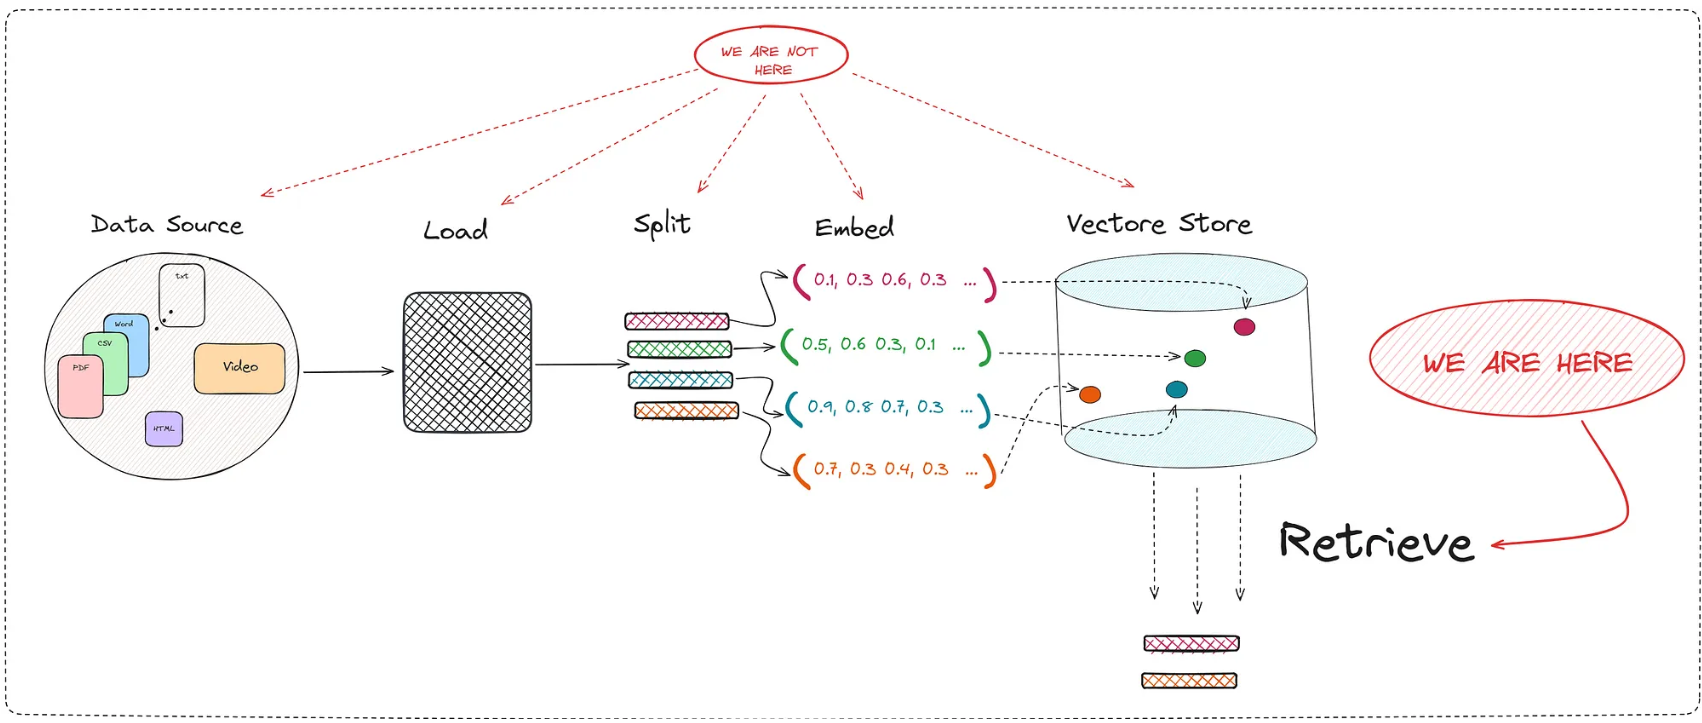

In [ ]:
import os
from google.colab import userdata
groq_api_key = userdata.get('groq_api')
os.environ["GROQ_API_KEY"] = groq_api_key

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0
)

Import your embeddings

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
# Define the path to the pre-trained model you want to use
modelPath = "sentence-transformers/all-MiniLM-l6-v2"

# Create a dictionary with model configuration options, specifying to use the CPU for computations
model_kwargs = {'device':'cpu'}

# Create a dictionary with encoding options, specifically setting 'normalize_embeddings' to False
encode_kwargs = {'normalize_embeddings': False}

# Initialize an instance of HuggingFaceEmbeddings with the specified parameters
embeddings = HuggingFaceEmbeddings(
    model_name=modelPath,     # Provide the pre-trained model's path
    model_kwargs=model_kwargs, # Pass the model configuration options
    encode_kwargs=encode_kwargs # Pass the encoding options
)

<ipython-input-11-215305267>:12: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from langchain_community.document_loaders import TextLoader
loader = TextLoader("/content/state_of_the_union.txt")
data = loader.load()
data

[Document(metadata={'source': '/content/state_of_the_union.txt'}, page_content='Title - From Time to Time: History of the State of the Union\n\n"The President shall from time to time give to Congress information of the State of the Union and recommend to their Consideration such measures as he shall judge necessary and expedient." Article II, Sec. 3, U.S. Constitution\n\nGeorge Washington rode on a carriage driven by six horses from his house on Cherry Street to Federal Hall in New York to give his deliver his first annual message in person.\nOn a cold January morning, the President rode in a carriage drawn by six horses from his residence on Cherry Street in New York to Federal Hall for a joint meeting of the two bodies of Congress, the House of Representatives and the Senate. When George Washington personally delivered the first annual message to Congress on January 8, 1790, he was aware of his constitutional duty to deliver his message and of the precedent he was setting for future 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
docs = text_splitter.split_documents(data)

In [ ]:
docs

## Vectordb as retriever

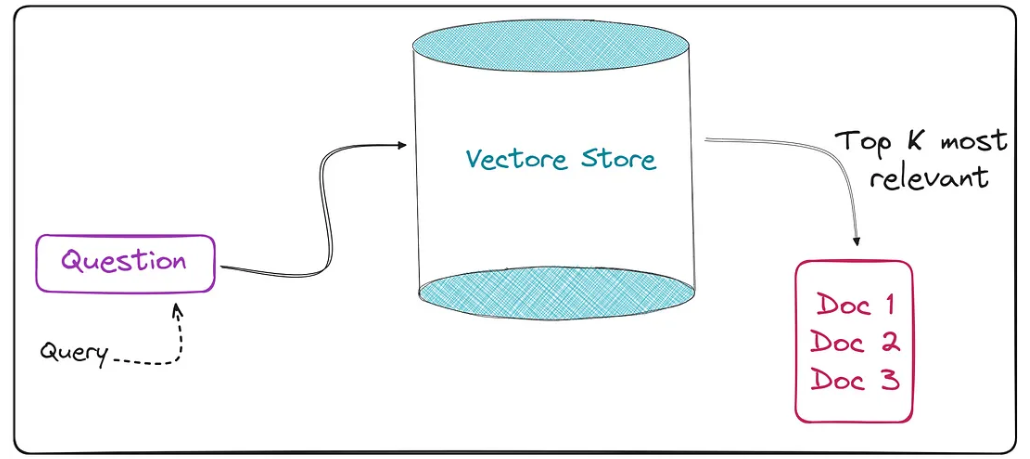

In [ ]:
from langchain_community.vectorstores import Chroma

In [ ]:

vectordb = Chroma.from_documents(docs, embeddings)
retriever=vectordb.as_retriever(search_type="mmr",search_kwargs={"k":1}, score_threshold=0.85)

In [ ]:
retriever

***Notes***

**MMR**-

MMR (Maximal Marginal Relevance) is a technique designed to minimize redundancy when retrieving relevant items for a query. Rather than selecting only the most relevant items, which may be highly similar, MMR optimizes for both relevance and diversity, ensuring a more varied and informative selection.

**top 'k' values**-

'k' number of documents you want to return


In [ ]:
from langchain.chains import RetrievalQA

In [ ]:

qa = RetrievalQA.from_chain_type(llm=llm, chain_type="refine", retriever=retriever, return_source_documents=False)

In [ ]:
question = "What constitutional duty compels the President to deliver the State of the Union message?"
result = qa.run({"query": question})
print(result)

***Notes***

**Chain types** -

**Stuff**:
This approach combines all documents into a single prompt and sends it to the LLM. It's straightforward and effective for smaller datasets that fit within the model's context window.

**Map-Reduce**:
Each document chunk is processed separately using an LLM, and a final summarization step combines the individual outputs. This method is well-suited for large datasets, supports parallel processing, but may treat documents in isolation.

**Refine**:
This method iteratively improves the response by incorporating information from each document sequentially, making it ideal for gradually building a more comprehensive answer.

**Map-Rerank**:
Each document is evaluated independently by the LLM, which assigns a relevance score. The highest-scoring document is selected, making this technique useful for identifying the most relevant information efficiently.









## MultiQueryRetriever

The MultiQueryRetriever simplifies prompt tuning by using an LLM to create multiple versions of a query from different angles. For each version, it finds related documents and combines all the results into one unique set to cover more relevant information.

In [ ]:
from langchain.retrievers.multi_query import MultiQueryRetriever

In [ ]:
MQRretriever = MultiQueryRetriever.from_llm(retriever=retriever, llm=llm)

In [ ]:
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="refine", retriever=MQRretriever)

In [ ]:
question = "What constitutional duty compels the President to deliver the State of the Union message?"
result = qa.run({"query": question})
print(result)

## Ensemble Retriever/Hybrid Search

- The EnsembleRetriever combines results from multiple retrievers and ranks them using the Reciprocal Rank Fusion algorithm.

- This approach takes advantage of the strengths of different retrievers to perform better than any single one.

- Also known as Hybrid search, it mixes a sparse retriever (like BM25) that works well with keywords and a dense retriever (like embedding similarity) that focuses on semantic meaning. Together, they provide more comprehensive and accurate results.

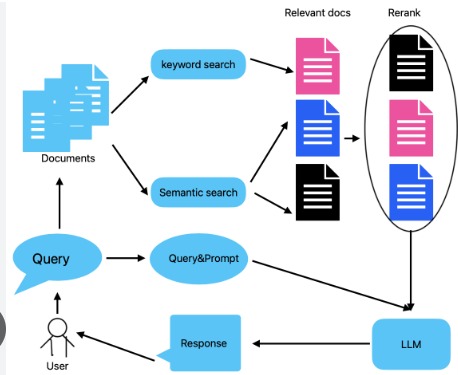

In [ ]:
!pip install -q rank_bm25

In [ ]:
from langchain.retrievers import EnsembleRetriever
from langchain_community.retrievers import BM25Retriever

In [ ]:
bm25_retriever = BM25Retriever.from_documents(docs)
bm25_retriever.k = 2  # Retrieve top 2 results
ensemble_retriever = EnsembleRetriever(retrievers=[bm25_retriever, retriever], weights=[0.2, 0.8])

In [ ]:
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="refine", retriever=ensemble_retriever)

In [ ]:
question = "How did George Washington set a precedent in his first State of the Union message?"
result = qa.run({"query": question})
print(result)

## ParentDocumentRetriever

When splitting documents for retrieval, there are two main challenges:

1. Smaller chunks ensure embeddings accurately reflect meaning, but if chunks are too long, their meaning can get diluted.

2. Larger chunks retain more context but may lose precision in meaning.

- The ParentDocumentRetriever balances this by splitting data into small chunks for storage.

- During retrieval, it fetches these small chunks and then identifies their "parent documents" (the larger document or chunk they came from) to provide a broader context.

- Here, the "parent document" is simply the original source of the smaller chunks, whether it's the entire document or a larger section of it.

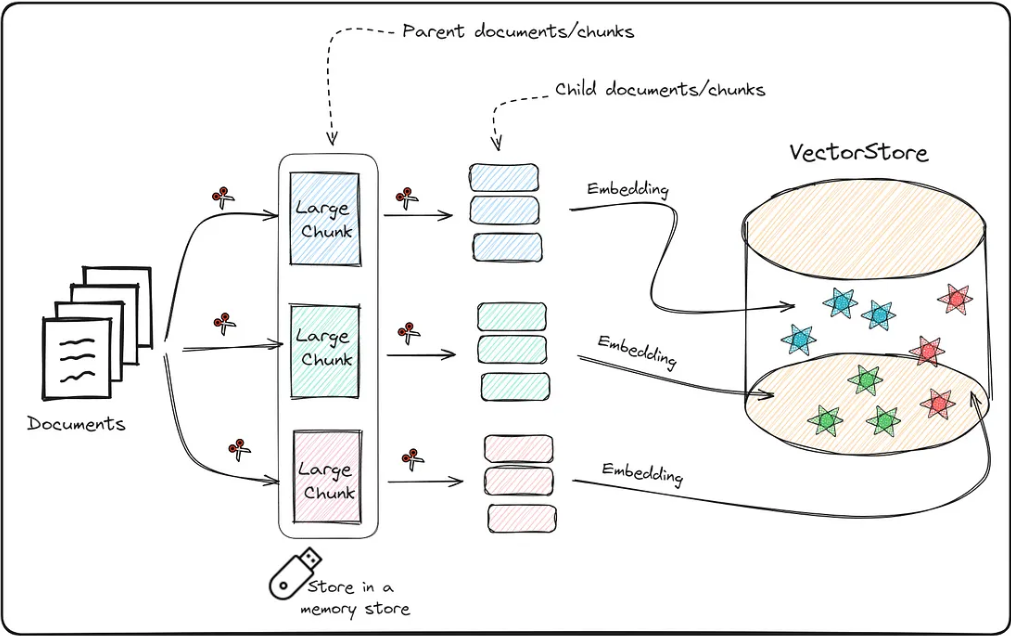

In [ ]:
from langchain.retrievers import ParentDocumentRetriever
from langchain.storage import InMemoryStore

In [ ]:
child_splitter = RecursiveCharacterTextSplitter(chunk_size=400)
parent_splitter = RecursiveCharacterTextSplitter(chunk_size=2000)
vectordb = Chroma.from_documents(docs, embeddings)

# The storage layer for the parent documents
store = InMemoryStore()

parent_child_retriever = ParentDocumentRetriever(
    vectorstore=vectordb,
    docstore=store,
    child_splitter=child_splitter,
    parent_splitter=parent_splitter
)

parent_child_retriever.add_documents(docs)

CHAIN TYPE: REFINE

In [ ]:
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="refine", retriever=parent_child_retriever)

In [ ]:
question = "How did George Washington set a precedent in his first State of the Union message?"
result = qa.run({"query": question})
print(result)

<ipython-input-58-1983139712>:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa.run({"query": question})


Based on the additional context, George Washington set a precedent in his first State of the Union message by personally delivering the message to Congress. Prior to this, the president's message was typically submitted in writing. By personally delivering the message, Washington established the practice of the president addressing Congress in person, which has continued to this day.


CHAIN TYPE: MAP_REDUCE

In [ ]:
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="map_reduce", retriever=parent_child_retriever)

In [ ]:
question = "How did George Washington set a precedent in his first State of the Union message?"
result = qa.run({"query": question})
print(result)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

George Washington set a precedent in his first State of the Union message by personally delivering it to Congress on January 8, 1790.


CHAIN TYPE: MAP_RERANK

In [ ]:
qa1 = RetrievalQA.from_chain_type(llm=llm, chain_type="map_rerank", retriever=parent_child_retriever)

In [ ]:
question = "How did George Washington set a precedent in his first State of the Union message?"
result = qa1.run({"query": question})
print(result)

<ipython-input-19-3734508887>:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa1.run({"query": question})
/usr/local/lib/python3.11/dist-packages/langchain/chains/llm.py:370: UserWarning: The apply_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


Helpful Answer: By personally delivering the first annual message to Congress on January 8, 1790, George Washington set a precedent for future presidents to deliver their State of the Union messages in person.


Custom map-rerank prompt

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA
from langchain.output_parsers import RegexParser

In [ ]:
# Create custom prompt template for map-rerank with score
# The map_rerank chain requires a score to rank different document chunks
custom_map_rerank_prompt = PromptTemplate(
    input_variables=["context", "question"],
    template="""
You are a historian assistant. Review the document and answer the question using ONLY the information in the document.
If the answer is implied, infer it. Do not say the document doesn't mention it unless you're sure.

Document: {context}
Question: {question}

IMPORTANT: Format your response EXACTLY as follows:
Answer: [Your answer here]
Score: [A single number from 1-10]

DO NOT add any additional text after the score.
""",
    output_parser=RegexParser(
        regex=r"Answer: (.*?)\nScore: (\d+)",
        output_keys=["answer", "score"],
    )
)

# Create RetrievalQA chain with map_rerank
qa1 = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="map_rerank",
    retriever=parent_child_retriever,
    chain_type_kwargs={"prompt": custom_map_rerank_prompt}
)

In [ ]:
result = qa1.run({"query": question})
print(result)

/usr/local/lib/python3.11/dist-packages/langchain/chains/llm.py:370: UserWarning: The apply_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


By emphasizing unity in his speech and not datelining his message with the name of the nation's capital, New York, but instead writing "United States".


With document sources

In [ ]:

# Create custom prompt template for map-rerank with score
custom_map_rerank_prompt = PromptTemplate(
    input_variables=["context", "question"],
    template="""
You are a historian assistant. Review the document and answer the question using ONLY the information in the document.
If the answer is implied, infer it. Do not say the document doesn't mention it unless you're sure.

Document: {context}
Question: {question}

IMPORTANT: Format your response EXACTLY as follows:
Answer: [Your answer here]
Score: [A single number from 1-10]

DO NOT add any additional text after the score.
""",
    output_parser=RegexParser(
        regex=r"Answer: (.*?)\nScore: (\d+)",
        output_keys=["answer", "score"],
    )
)

# Create RetrievalQA chain with map_rerank and verbose mode to see scores
qa1 = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="map_rerank",
    retriever=parent_child_retriever,
    chain_type_kwargs={"prompt": custom_map_rerank_prompt},
    verbose=True,
    return_source_documents=True
)

# Run the query and see scores in the verbose output
result = qa1.invoke({"query": question})
print("Final Answer:", result['result'])
print("Number of source documents:", len(result['source_documents']))



> Entering new RetrievalQA chain...


/usr/local/lib/python3.11/dist-packages/langchain/chains/llm.py:370: UserWarning: The apply_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(



> Finished chain.
Final Answer: By emphasizing unity in his speech and not datelining his message with the name of the nation's capital, New York, but instead writing "United States".
Number of source documents: 3


with scores of each documents

In [ ]:
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.output_parsers import RegexParser

# Create custom prompt template for map-rerank with score
custom_map_rerank_prompt = PromptTemplate(
    input_variables=["context", "question"],
    template="""
You are a historian assistant. Review the document and answer the question using ONLY the information in the document.
If the answer is implied, infer it. Do not say the document doesn't mention it unless you're sure.

Document: {context}
Question: {question}

IMPORTANT: Format your response EXACTLY as follows:
Answer: [Your answer here]
Score: [A single number from 1-10]

DO NOT add any additional text after the score.
""",
    output_parser=RegexParser(
        regex=r"Answer: (.*?)\nScore: (\d+)",
        output_keys=["answer", "score"],
    )
)

# Create RetrievalQA chain with map_rerank
qa1 = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="map_rerank",
    retriever=parent_child_retriever,
    chain_type_kwargs={"prompt": custom_map_rerank_prompt},
    return_source_documents=True
)

# Function to manually see scores for each document
def get_scores_for_documents(question):
    # Get the retrieved documents
    docs = qa1.retriever.get_relevant_documents(question)

    # Get the underlying chain
    map_rerank_chain = qa1.combine_documents_chain

    # Process each document to get individual scores
    scores = []
    for i, doc in enumerate(docs):
        try:
            # Run the LLM on each document individually
            result = map_rerank_chain.llm_chain.run(context=doc.page_content, question=question)
            print(f"Document {i+1} result: {result}")

            # Try to extract score
            if "Score:" in result:
                score_text = result.split("Score:")[-1].strip().split()[0]
                if score_text.isdigit():
                    scores.append((i+1, int(score_text)))
        except Exception as e:
            print(f"Error processing document {i+1}: {e}")

    return scores

# Run the main query
result = qa1.invoke({"query": question})
print("Final Answer:", result['result'])

# Get individual scores
print("\nIndividual document scores:")
scores = get_scores_for_documents(question)
for doc_num, score in scores:
    print(f"Document {doc_num}: Score {score}")

/usr/local/lib/python3.11/dist-packages/langchain/chains/llm.py:370: UserWarning: The apply_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


Final Answer: By emphasizing unity in his speech and not datelining his message with the name of the nation's capital, New York, but instead writing "United States".

Individual document scores:


<ipython-input-44-4097413590>:39: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = qa1.retriever.get_relevant_documents(question)


Document 1 result: Answer: By emphasizing unity in his speech and not datelining his message with the name of the nation's capital, New York, but instead writing "United States".
Score: 8
Document 2 result: Answer: He set a precedent for future presidents by personally delivering the first annual message to Congress.
Score: 8
Document 3 result: Answer: He spoke the message in person.
Score: 8
Document 1: Score 8
Document 2: Score 8
Document 3: Score 8


CHAIN TYPE: STUFF

In [ ]:
qa2 = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=parent_child_retriever)

In [ ]:
question = "In his first State of the Union, what precedent did George Washington set according to the text?"
result = qa2.run({"query": question})
print(result)

According to the text, George Washington set a precedent for future presidents by personally delivering the first annual message to Congress.


In [ ]:
retrieved_docs = parent_child_retriever.get_relevant_documents(question)
for i, doc in enumerate(retrieved_docs):
    print(f"\n--- Chunk {i+1} ---\n{doc.page_content}\n")



--- Chunk 1 ---
The President's focus, however, was on the very concept of union itself. Washington and his administration were concerned with the challenges of establishing a nation and maintaining a union. The experiment of American democracy was in its infancy. Aware of the need to prove the success of the "union of states," Washington included a significant detail in his speech. Instead of datelining his message with the name of the nation's capital, New York, Washington emphasized unity by writing "United


--- Chunk 2 ---
On a cold January morning, the President rode in a carriage drawn by six horses from his residence on Cherry Street in New York to Federal Hall for a joint meeting of the two bodies of Congress, the House of Representatives and the Senate. When George Washington personally delivered the first annual message to Congress on January 8, 1790, he was aware of his constitutional duty to deliver his message and of the precedent he was setting for future presidents.



Custom stuff prompt

In [ ]:
custom_prompt = PromptTemplate.from_template("""
You are a historian AI assistant. Use the context below to answer the question as accurately and insightfully as possible.

If the answer is not explicitly stated, use reasoning and inference based on what is said. Do NOT rely on outside historical facts unless they are clearly implied in the context.

---
Context:
{context}

Question:
{question}

Answer:
""")


In [ ]:
qa_custom_stuff = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=parent_child_retriever,
    chain_type_kwargs={"prompt": custom_prompt}
)

question = "How did George Washington set a precedent in his first State of the Union message?"
result = qa_custom_stuff.run(question)
print(result)


George Washington set a precedent in his first State of the Union message by personally delivering the message to Congress, as well as by emphasizing unity in his speech. However, the most significant precedent he set was by delivering his message in person to both houses of Congress, which was later revived by Woodrow Wilson in 1913.


Try to create separate pipelines for Advanced RAG techniques and compare answers

In [ ]:
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.output_parsers import RegexParser
from langchain.retrievers import ParentDocumentRetriever, ContextualCompressionRetriever, EnsembleRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain.retrievers.multi_query import MultiQueryRetriever
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
import time

# LOAD YOUR UPLOADED TEXT FILE
from langchain.document_loaders import TextLoader

# Replace 'your_file.txt' with the actual name of your uploaded file
loader = TextLoader("/content/state_of_the_union.txt")  # Put your actual filename here
documents = loader.load()

print(f"Loaded {len(documents)} documents")
print(f"First document preview: {documents[0].page_content[:200]}...")

# Assume you also have: llm, embeddings already defined from your previous setup

# Base historian prompt template
historian_prompt = PromptTemplate.from_template("""
You are a historian assistant. Use the following context to answer the question.
If the answer is implied, infer it. Do not say the context doesn't mention it unless you're sure.

Context:
{context}

Question: {question}

Helpful Answer:
""")

# Map-rerank specific prompt with scoring
map_rerank_prompt = PromptTemplate(
    input_variables=["context", "question"],
    template="""
You are a historian assistant. Review the document and answer the question using ONLY the information in the document.
If the answer is implied, infer it. Do not say the document doesn't mention it unless you're sure.

Document: {context}
Question: {question}

IMPORTANT: Format your response EXACTLY as follows:
Answer: [Your answer here]
Score: [A single number from 1-10]
""",
    output_parser=RegexParser(
        regex=r"Answer: (.*?)\nScore: (\d+)",
        output_keys=["answer", "score"],
    )
)

# 1. BASIC RAG PIPELINE
def create_basic_rag():
    # Simple text splitting
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=500,
        chunk_overlap=50
    )
    splits = text_splitter.split_documents(documents)

    # Create vector store
    vectorstore = Chroma.from_documents(splits, embeddings)
    retriever = vectorstore.as_retriever(search_kwargs={"k": 3})

    # Create QA chain
    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type="stuff",
        retriever=retriever,
        chain_type_kwargs={"prompt": historian_prompt},
        return_source_documents=True
    )

    return qa_chain, "Basic RAG"

# 2. PARENT-CHILD RETRIEVAL PIPELINE
def create_parent_child_rag():
    # Small chunks for search
    child_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=20)
    # Large chunks for context
    parent_splitter = RecursiveCharacterTextSplitter(chunk_size=800, chunk_overlap=80)

    vectorstore = Chroma(embedding_function=embeddings)

    parent_child_retriever = ParentDocumentRetriever(
        vectorstore=vectorstore,
        docstore=InMemoryStore(),
        child_splitter=child_splitter,
        parent_splitter=parent_splitter,
        k=3
    )
    parent_child_retriever.add_documents(documents)

    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type="stuff",
        retriever=parent_child_retriever,
        chain_type_kwargs={"prompt": historian_prompt},
        return_source_documents=True
    )

    return qa_chain, "Parent-Child Retrieval"

# 3. MAP-RERANK PIPELINE
def create_map_rerank_rag():
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    splits = text_splitter.split_documents(documents)
    vectorstore = Chroma.from_documents(splits, embeddings)
    retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type="map_rerank",
        retriever=retriever,
        chain_type_kwargs={"prompt": map_rerank_prompt},
        return_source_documents=True
    )

    return qa_chain, "Map-Rerank"

# 4. CONTEXTUAL COMPRESSION PIPELINE
def create_compression_rag():
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
    splits = text_splitter.split_documents(documents)
    vectorstore = Chroma.from_documents(splits, embeddings)
    base_retriever = vectorstore.as_retriever(search_kwargs={"k": 8})

    # Compress retrieved documents
    compressor = LLMChainExtractor.from_llm(llm)
    compression_retriever = ContextualCompressionRetriever(
        base_compressor=compressor,
        base_retriever=base_retriever
    )

    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type="stuff",
        retriever=compression_retriever,
        chain_type_kwargs={"prompt": historian_prompt},
        return_source_documents=True
    )

    return qa_chain, "Contextual Compression"

# 5. MULTI-QUERY PIPELINE
def create_multi_query_rag():
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    splits = text_splitter.split_documents(documents)
    vectorstore = Chroma.from_documents(splits, embeddings)
    base_retriever = vectorstore.as_retriever(search_kwargs={"k": 3})

    # Generate multiple queries
    multi_query_retriever = MultiQueryRetriever.from_llm(
        retriever=base_retriever,
        llm=llm
    )

    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type="stuff",
        retriever=multi_query_retriever,
        chain_type_kwargs={"prompt": historian_prompt},
        return_source_documents=True
    )

    return qa_chain, "Multi-Query"

# 6. MAP-REDUCE PIPELINE
def create_map_reduce_rag():
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    splits = text_splitter.split_documents(documents)
    vectorstore = Chroma.from_documents(splits, embeddings)
    retriever = vectorstore.as_retriever(search_kwargs={"k": 6})

    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type="map_reduce",
        retriever=retriever,
        chain_type_kwargs={"question_prompt": historian_prompt},
        return_source_documents=True
    )

    return qa_chain, "Map-Reduce"

# 7. HYBRID RETRIEVAL PIPELINE (BM25 + Vector Search)
def create_hybrid_rag():
    from langchain.retrievers import BM25Retriever

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    splits = text_splitter.split_documents(documents)

    # Vector retriever
    vectorstore = Chroma.from_documents(splits, embeddings)
    vector_retriever = vectorstore.as_retriever(search_kwargs={"k": 4})

    # BM25 retriever (keyword-based)
    bm25_retriever = BM25Retriever.from_documents(splits)
    bm25_retriever.k = 4

    # Ensemble retriever combines both
    ensemble_retriever = EnsembleRetriever(
        retrievers=[vector_retriever, bm25_retriever],
        weights=[0.5, 0.5]  # Equal weight to both retrievers
    )

    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type="stuff",
        retriever=ensemble_retriever,
        chain_type_kwargs={"prompt": historian_prompt},
        return_source_documents=True
    )

    return qa_chain, "Hybrid (Vector + BM25)"

# COMPARISON FUNCTION
def compare_rag_techniques(question):
    # Create all pipelines
    pipelines = [
        create_basic_rag(),
        create_parent_child_rag(),
        create_map_rerank_rag(),
        create_compression_rag(),
        create_multi_query_rag(),
        create_map_reduce_rag(),
        create_hybrid_rag()
    ]

    results = []

    print(f"Question: {question}")
    print("=" * 80)

    for qa_chain, method_name in pipelines:
        print(f"\n🔍 {method_name.upper()}")
        print("-" * 40)

        try:
            start_time = time.time()
            result = qa_chain.invoke({"query": question})
            end_time = time.time()

            answer = result['result']
            num_sources = len(result.get('source_documents', []))
            response_time = round(end_time - start_time, 2)

            print(f"Answer: {answer}")
            print(f"Sources used: {num_sources}")
            print(f"Response time: {response_time}s")

            results.append({
                'method': method_name,
                'answer': answer,
                'sources': num_sources,
                'time': response_time,
                'source_docs': result.get('source_documents', [])
            })

        except Exception as e:
            print(f"Error with {method_name}: {str(e)}")
            results.append({
                'method': method_name,
                'answer': f"Error: {str(e)}",
                'sources': 0,
                'time': 0,
                'source_docs': []
            })

    # Summary comparison
    print("\n" + "=" * 80)
    print("📊 SUMMARY COMPARISON")
    print("=" * 80)

    for result in results:
        if not result['answer'].startswith('Error'):
            print(f"\n{result['method']}:")
            print(f"  Answer length: {len(result['answer'])} chars")
            print(f"  Sources: {result['sources']}")
            print(f"  Time: {result['time']}s")

    return results

# USAGE EXAMPLE
# results = compare_rag_techniques("How did George Washington emphasize unity in his first State of the Union?")

# To run a specific comparison:
# results = compare_rag_techniques(question)

Loaded 1 documents
First document preview: Title - From Time to Time: History of the State of the Union

"The President shall from time to time give to Congress information of the State of the Union and recommend to their Consideration such me...


In [ ]:
# Run the comparison
results = compare_rag_techniques("How did George Washington emphasize unity in his first State of the Union?")



Question: How did George Washington emphasize unity in his first State of the Union?

🔍 BASIC RAG
----------------------------------------
Answer: George Washington emphasized unity in his first State of the Union by writing "United" instead of the name of the nation's capital, New York, in the dateline of his message.
Sources used: 3
Response time: 0.41s

🔍 PARENT-CHILD RETRIEVAL
----------------------------------------
Answer: In George Washington's first State of the Union address, delivered on January 8, 1790, he emphasized unity by calling for the creation of a national bank to stabilize the economy and provide a unified financial system. He also advocated for a system of tariffs to protect American industries and promote economic growth.

Furthermore, Washington stressed the importance of a strong central government in maintaining national unity. He argued that a unified government would be better equipped to address the challenges facing the young nation, such as debt from the R

/usr/local/lib/python3.11/dist-packages/langchain/chains/llm.py:370: UserWarning: The apply_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


Answer: By writing "United States" instead of the name of the nation's capital, New York.
Sources used: 5
Response time: 1.66s

🔍 CONTEXTUAL COMPRESSION
----------------------------------------
Answer: George Washington emphasized unity in his first State of the Union by writing "United" instead of the name of the nation's capital, New York, at the beginning of his message. This deliberate choice highlighted the importance of unity among the states and demonstrated his administration's focus on maintaining a strong and cohesive union.
Sources used: 8
Response time: 3.74s

🔍 MULTI-QUERY
----------------------------------------
Answer: George Washington emphasized unity in his first State of the Union by writing "United States" instead of the name of the nation's capital, New York, at the top of his message. This deliberate choice highlighted the importance of the union of states and demonstrated his administration's focus on maintaining a unified nation.
Sources used: 7
Response time: 0